<a href="https://colab.research.google.com/github/Mburia/Machine-Learning-Comparison-Between-a-Polynomial-and-Logistic-Approach-to-Predicting-Game-Results/blob/main/Logistic%20Vs%20Polynomial%20Approach%20to%20Solving%20a%20Machine%20Learning%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CORE

# INDEPENDENT PROJECT

## A. Defining the Question

### a) Specifying the Data Analytic Question

- Predict results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the Metric for Success

- Achieve OPTIMUM accuracy in modelling
- Achieve an R.M.S.E. Score less than 10% of the mean of the actual data

### c) Understanding the context 

We have two possible approaches (as  shown below) given the datasets provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores

 

Approach 2 Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### d) Recording the Experimental Design

- True experimental research design

.

.

## B. Reading the Data

### I. Importing Libraries 

#### a. Basic Python Libraries

In [ ]:
# Importing os
import os


# Importing Numpy
import numpy as np


# Importing Pandas
import pandas as pd


# Importing Seaborn
import seaborn as sns


# Importing researchpy
!pip install researchpy
import researchpy as rp


# Importing scipy from stats
from scipy import stats


# Importing Matplotlib
import matplotlib.pyplot as plt


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind


# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp



from IPython.display import display


# Importing warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



.

#### b. Machine Learning Libraries

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

.

### II. Importing Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---

df = pd.read_csv('results.csv')

rank =  pd.read_csv('fifa_ranking.csv')

.

## C. Checking the Data

~ DATA SET SIZE

In [ ]:
# Determining the no. of records in our dataset
#

print('The results dataset has ', df.shape[1], ' columns and ', df.shape[0], ' rows!')

print('The ranking dataset has ', rank.shape[1], ' columns and ', rank.shape[0], ' rows!')

The results dataset has  9  columns and  40839  rows!
The ranking dataset has  16  columns and  57793  rows!


.

~ DISPLAYING OUR DATA

In [ ]:
# Previewing the top of our dataset
#

df.head(3)

date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False

[3 rows x 9 columns]

In [ ]:
rank.head(3)

rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08

[3 rows x 16 columns]

In [ ]:
# Previewing the bottom of our dataset
# 

df.tail(3)

date         home_team    away_team  ...       city  country neutral
40836  2019-07-19           Senegal      Algeria  ...      Cairo    Egypt    True
40837  2019-07-19        Tajikistan  North Korea  ...  Ahmedabad    India    True
40838  2019-07-20  Papua New Guinea         Fiji  ...       Apia    Samoa    True

[3 rows x 9 columns]

In [ ]:
rank.tail(3)

rank country_full  ... confederation   rank_date
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[3 rows x 16 columns]

.

~ EXTRA INFORMATION ABOUT OUR DATA

- Data Types(whether numeric or categorical)

In [ ]:
# Checking whether each column has an appropriate datatype
#

df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

.

- Unique values in the variables of our data

In [ ]:
# Checking unique values and number of rows asigned for each column in the dataset

for i in df.columns:
  
  print('\n')
  
  print(df[i].value_counts())




2012-02-29    66
2016-03-29    63
2008-03-26    60
2014-03-05    59
2012-11-14    56
2011-10-11    54
2011-11-11    54
2011-11-15    53
2008-10-11    53
2011-09-02    52
2011-09-06    52
2010-08-11    51
2013-10-15    50
2013-02-06    50
2008-08-20    50
2012-09-11    50
2012-10-16    50
2004-11-17    49
2008-09-06    49
2009-08-12    49
2018-03-27    49
2013-08-14    47
2010-03-03    47
2012-08-15    47
2015-11-17    47
2008-11-19    46
2010-11-17    46
2004-03-31    46
2007-08-22    46
2011-08-10    46
              ..
1962-07-11     1
1952-08-31     1
1983-06-13     1
1995-03-10     1
1908-03-16     1
1976-06-17     1
1893-03-13     1
1921-04-24     1
1924-08-24     1
1964-06-06     1
1933-03-12     1
1896-03-21     1
1991-09-08     1
1973-03-17     1
1975-04-19     1
1988-05-10     1
1943-06-20     1
1964-11-08     1
1961-01-15     1
2017-10-02     1
1908-06-13     1
1972-07-20     1
1926-12-12     1
1970-01-14     1
1989-06-21     1
1920-09-19     1
1982-06-10     1
1980-04-05  

.

~ COMPILED REPORT OF WHAT OUR DATA CONTAINS

In [ ]:
# checking the profile of our dataset

import pandas_profiling

pandas_profiling.ProfileReport(df)

.

## D. Tidying the Dataset

~ CHECKING FOR OUTLIERS

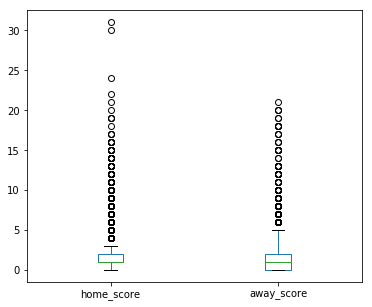

In [ ]:
# Checking for Outliers
#
%matplotlib inline
df.plot.box(figsize=(6,5))

plt.show()

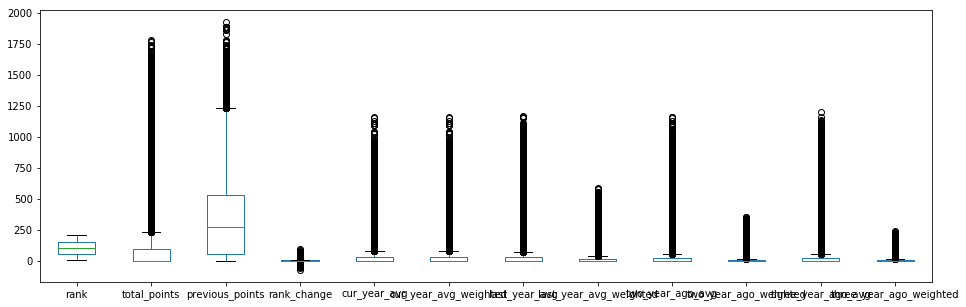

In [ ]:
# Checking for Outliers
#
%matplotlib inline
rank.plot.box(figsize=(16,5))

plt.show()

~ OBSERVATION:
- OUTLIERS ARE PRESENT IN THE MAJORITY OF MY VARIABLES
- REMOVING THESE OUTLIERS BEFORE MODELING MIGHT RESULT IN MASSIVE LOSS OF SIGNIFICANT DATA

.

~ CHECKING FOR ANOMALIES

In [ ]:
# Checking for Anomalies
#

df.describe()

home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [ ]:
rank.describe()

rank  total_points  ...  three_year_ago_avg  three_year_ago_weighted
count  57793.000000  57793.000000  ...        57793.000000             57793.000000
mean     101.628086    122.068637  ...           59.173916                11.834811
std       58.618424    260.426863  ...          135.533343                27.106675
min        1.000000      0.000000  ...            0.000000                 0.000000
25%       51.000000      0.000000  ...            0.000000                 0.000000
50%      101.000000      0.000000  ...            0.000000                 0.000000
75%      152.000000     92.790000  ...           21.250000                 4.250000
max      209.000000   1775.030000  ...         1200.770000               240.150000

[8 rows x 12 columns]

~ OBSERVATION:
- THE DATA IS EVENLY DISTRIBUTED IN MAJORITY OF THE COLUMNS
- NO OUTSTANDING ANOMALIES DETECTED

.

~  CHECKING FOR MISSING DATA 

In [ ]:
# Identifying existence of missing data in the dataset

df.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [ ]:
rank.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

~ OBSERVATION:
- NO MISSING DATA DETECTED
- THEREFORE NO DATA LOSS OR FILLING DUMMY DATA TO ELIMINATE NULL VALUES RECQUIRED

.

~ MORE DATA CLEANING PROCEDURES

In [ ]:
# More data cleaning procedures
#
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


~ OBSEVATION
- THE DATA IS CLEAN ENOUGH FOR ANALYSIS THEREFORE NO FURTHER DATA TIDYING NECESSARY AT THIS POINT  

.

## E. Exploratory Analysis

### a. Merging the data sets

~ SEPARATING TIME COLUMNS(month, year)

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year

df['month'] = pd.DatetimeIndex(df['date']).month

rank['year'] = pd.DatetimeIndex(rank['rank_date']).year

rank['month'] = pd.DatetimeIndex(rank['rank_date']).month

~ MERGING THE RESULT AND RANK DATASET

In [ ]:
df = pd.merge(rank,df,how = 'inner', left_on =['month','year', 'country_full'], right_on = ['month','year','country'])

.

### a. Univariate Analysis

~ SKEWNESS MEASUREMENT

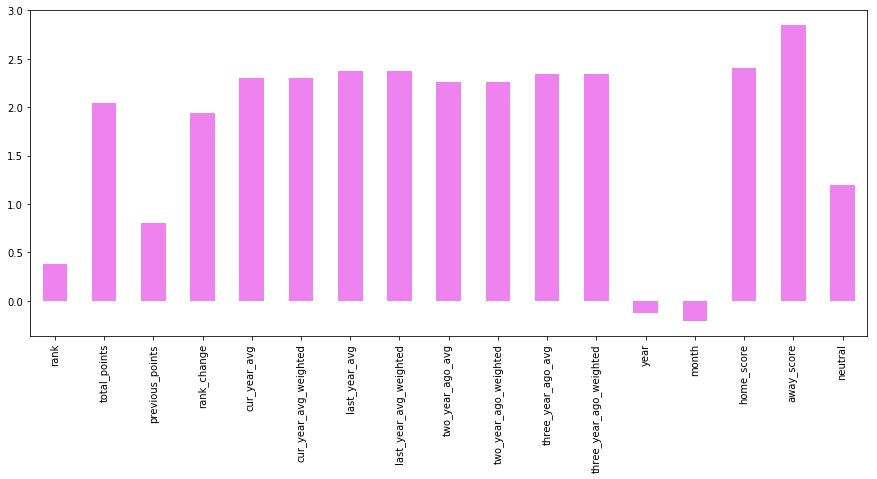

In [ ]:
# Calculating Skewness in the columns of our dataset

df.skew().plot.bar(figsize =(15,6),color = 'violet')
plt.show()

~ OBSERVATION: MAJORITY OF THE VARIABLES ARE POSITIVELY SKEWED
- THIS MEANS THAT THE DATA IS DISTRIBUTED MORE TOWARDS THE POSITIVE SIDE OF THE MEAN

.

~ CURTOSIS MEASUREMENT

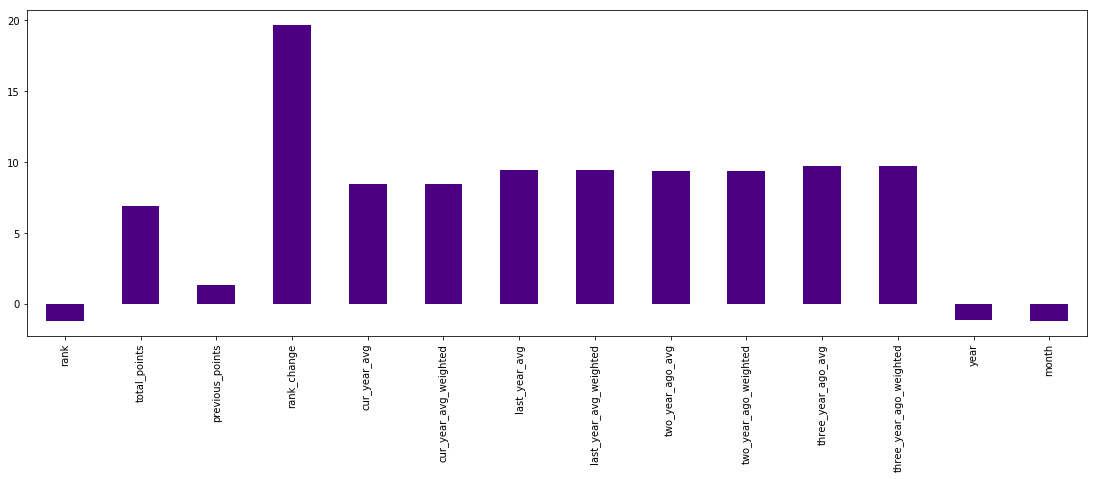

In [ ]:
# Measuring curtosis

rank.kurt().plot.bar(figsize =(19,6), color = 'indigo')
plt.show()

~ OBSERVATION: RANK CHANGE COLUMN DISPLAYS HIGHLY POSITIVE CURTOSIS
- THEREFORE ITS DATA IS LEPTOCURTIC(data is spread out very close to the mean and median)

.

### b. Bivariate Analysis

~ CORRELATION ANALYSIS

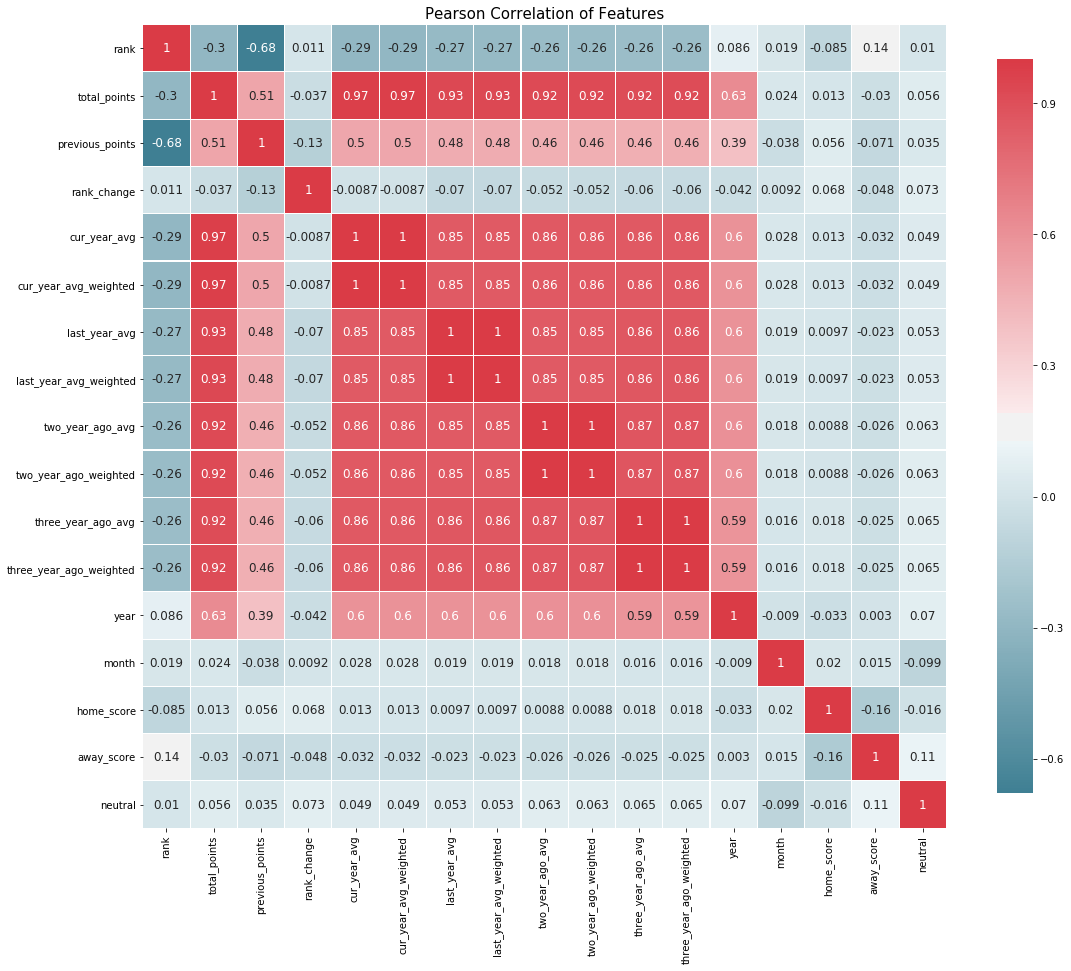

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
# correlation heatmap of dataset

def correlation_heatmap(df):
  
    _ , ax = plt.subplots(figsize =(18, 15))
    
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        
        df.corr(), 
        
        cmap = colormap,
        
        square=True, 
        
        cbar_kws={'shrink':.9 }, 
        
        ax=ax,
        
        annot=True, 
        
        linewidths=0.1,vmax=1.0, linecolor='white',
        
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

~ OBSERVATION: NUMEROUS COLUMNS ARE CORRELATED TO EACH OTHER
- THIS MIGHT PROVE A CHALLENGE IN MODELING (v.i.f. analysis is necessary)

.

~ CROSS PLOTS ANALYSIS

<Figure size 1008x1008 with 0 Axes>

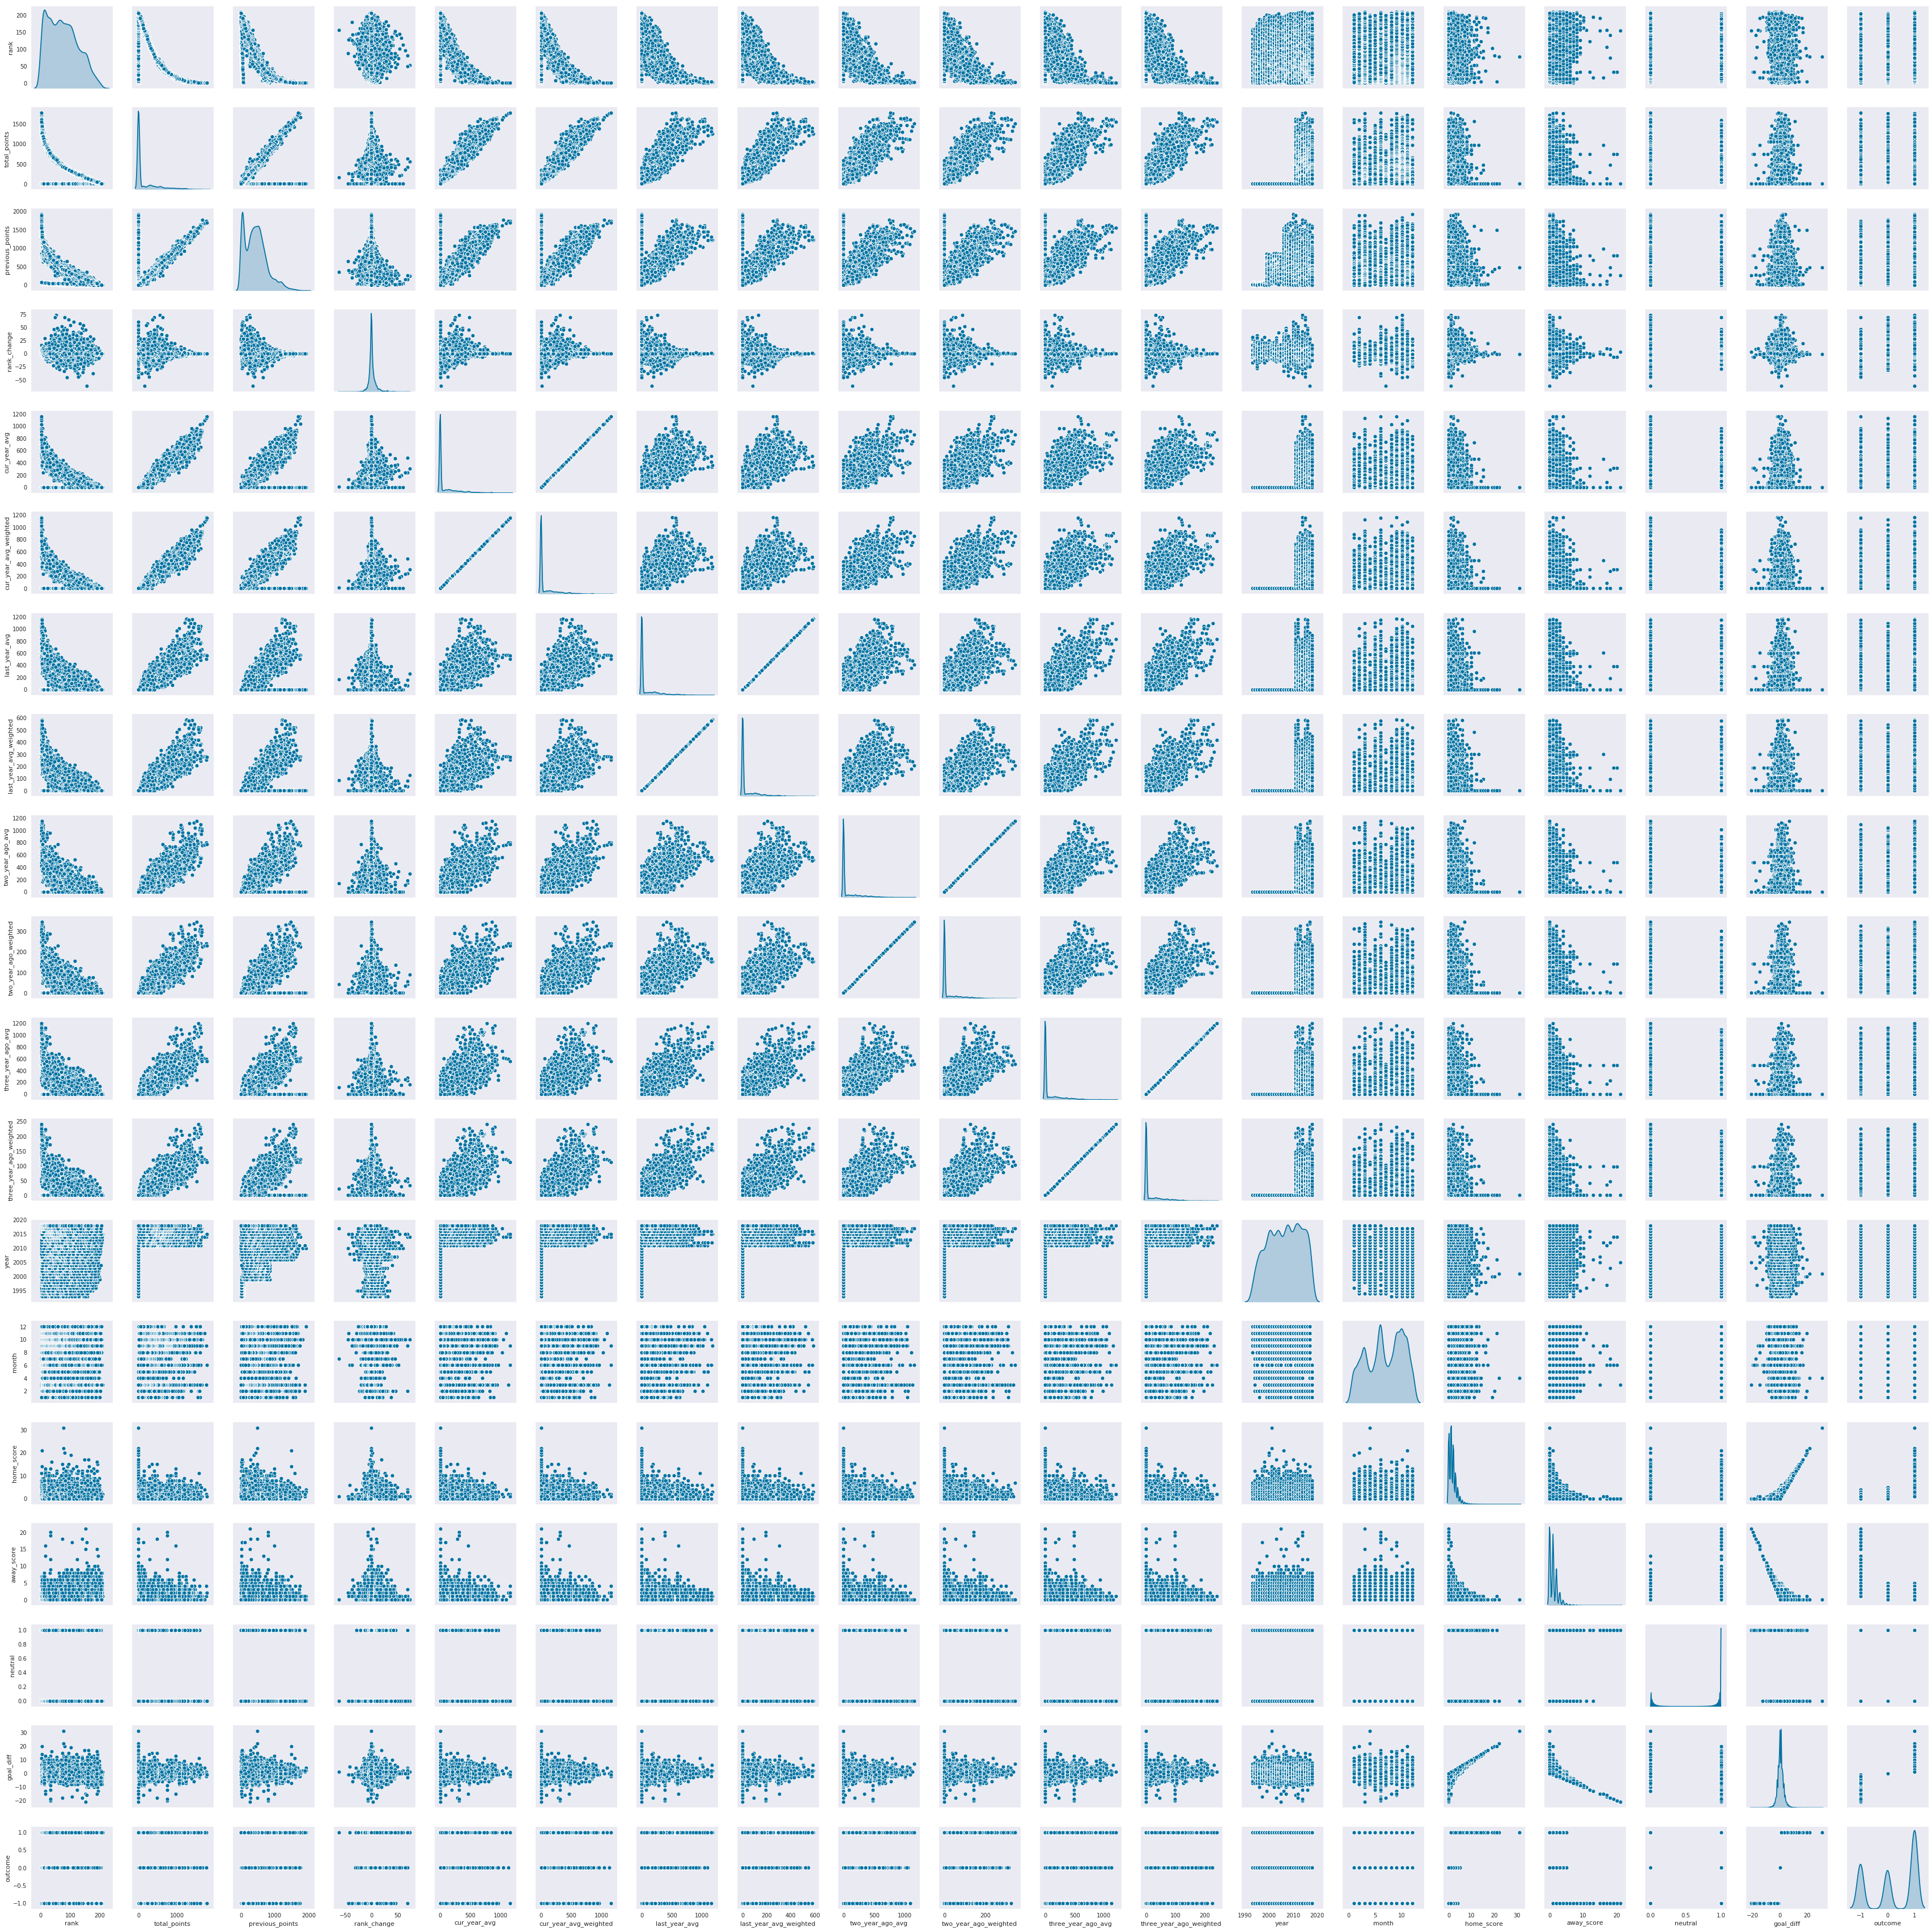

In [ ]:
# CROSS PLOTS ANALYSIS

sns.set_style('dark')

plt.figure(figsize=(14, 14),facecolor= 'indigo',edgecolor = 'green')


sns.pairplot(df, diag_kind='kde')

plt.show()

~ OBSERVATION: 
- MY Y LABEL(home score)CROSSPLOTS AGAINST THE INDEPENDENT VARIABLES DOES NOT DISPLAY VIVID COLLINEARITY.
- THEREFORE MODELING USING A REGRESSION MODEL WILL NOT DISPLAY OPTIMUM PERFORMANCE 

.

### c. Polynomial Regression Analysis

#### I. Multicollinearity

In [ ]:
# Getting correlation

a = df.corr()

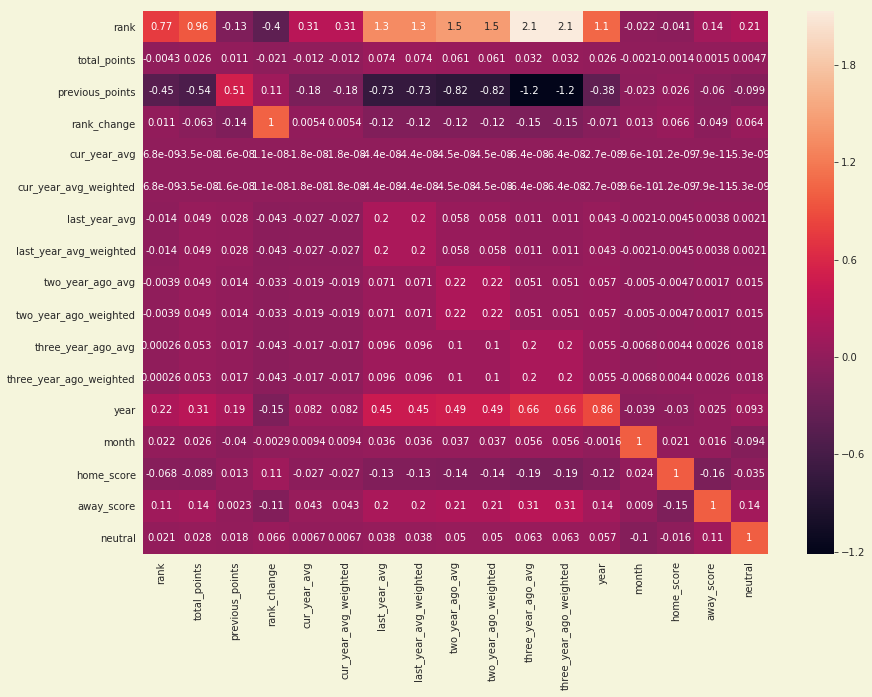

In [ ]:
# Calculating V.I.F. to determine multicollinearity

a = pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)

sns.set_style('dark')

plt.figure(figsize=(14, 10),facecolor= 'beige')

sns.heatmap(a, annot = True)

plt.show()


~ OBSERVATION: 
- DATA VARIABLES HAVE V.I.F. VALUES RANGING FROM 1 TO 2
- THEREFORE NO MULTICOLLINEARITY BETWEEN INDEPENDENT VARIABLES IN THE DATA
- Multicollinearity is present when V.I.F. scores are greater than 1 and extreme when values are greater than 5
- SINCE THE VARIABLES HAVE NOT DISPLAYED HIGH MULTICOLLINEARITY, WE SHALL PROCEED TO MODELING WITHOUT DROPPING ANY COLUMNS AT THIS POINT

.

## F. Modelling

#### I. Encoding categorical columns

- 1.Tournament column

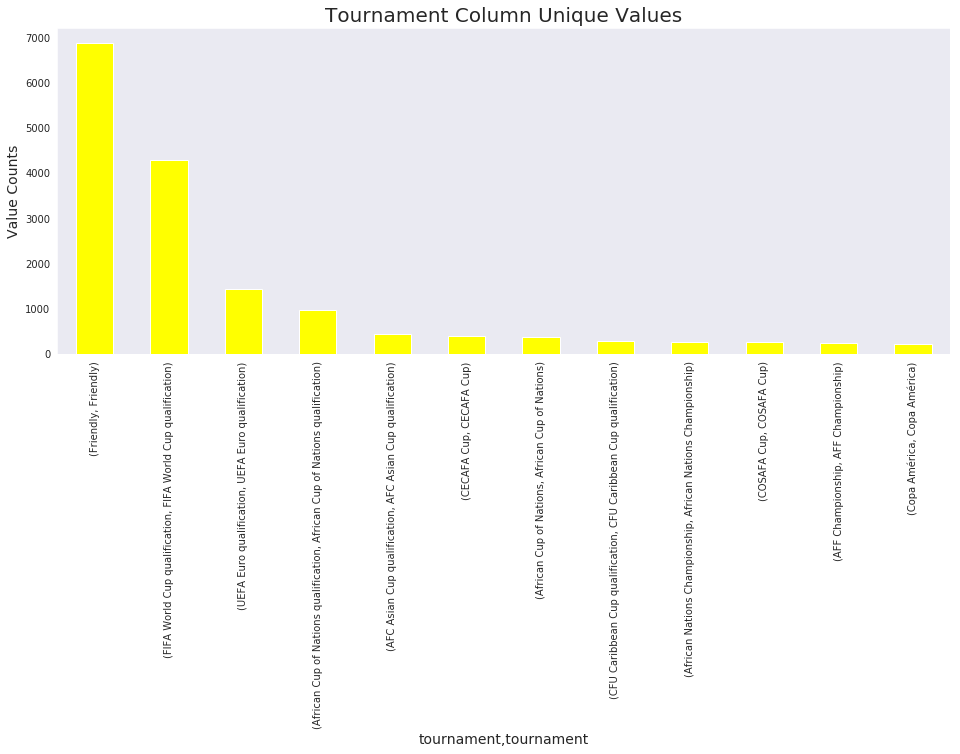

In [ ]:
# Unique value counts for tournament column

plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.title('Tournament Column Unique Values', fontsize = 20)

plt.xlabel('Unique Values', fontsize = 14)

plt.ylabel('Value Counts', fontsize = 14)

df.groupby(['tournament'])['tournament'].value_counts().sort_values(ascending = False).head(12).plot(kind = 'bar', color = 'yellow')


plt.show()

~ OBSERVATION:

- Tournament column has 68 unique categorical values, of which 3 hold over 80% of the data,

- therefore we shall class them to 3 classes then encode them to numeric values for modeling 

In [ ]:
# CREATING FUNCTION TO CLASS UNIQUE VALUES

def game_type(q):
  
  if q == 'Friendly':
    
    return 'Friendly'
  
  elif q == 'FIFA World Cup':
    
    return 'World Cup'
  
  else:
    
    return 'Other'
  
df['tournament_type'] = df.tournament.apply(lambda q: game_type(q))

In [ ]:
df['tournament_type'].unique()

array(['Friendly', 'Other', 'World Cup'], dtype=object)

~ Mapping

In [ ]:
df['tournament_type'] = df['tournament_type'].map({'Friendly' : 0, 'Other': 1, 'World Cup': 2 })

In [ ]:
df.head(3)

rank country_full country_abrv  ...    country  neutral  tournament_type
0     4       Sweden          SWE  ...     Sweden    False                0
1     4       Sweden          SWE  ...     Sweden    False                1
2     5    Argentina          ARG  ...  Argentina    False                1

[3 rows x 28 columns]

.

- 2. Neutral Column

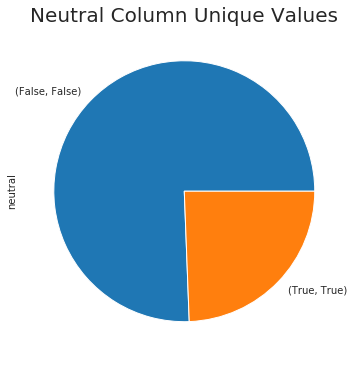

In [ ]:
# Unique value counts for neutral column

plt.subplots(figsize = (26,6))

sns.set_style('dark')

plt.title('Neutral Column Unique Values', fontsize = 20)

df.groupby(['neutral'])['neutral'].value_counts().sort_values(ascending = False).head(12).plot(kind = 'pie')

plt.show()

~ OBSERVATION:
- The majority of games were not played in their home country
- THIS COULD PROVE VITAL IN MODELING THEREFORE WE SHALL MAP THIS COLUMNS VALUES TO NUMERICS

~ Mapping

In [ ]:
df.neutral.unique()

array([False,  True])

In [ ]:
df['neutral'] = df['neutral'].map({False : 0, True: 1})

In [ ]:
df.head(2)

rank country_full country_abrv  ...   city  country  neutral
0     4       Sweden          SWE  ...  Borås   Sweden        0
1     4       Sweden          SWE  ...  Solna   Sweden        0

[2 rows x 27 columns]

.

#### II. Creating a win, lose or draw column 

~ FOR LOGISTIC REGRESSION MODELING WE NEED A COLUMN WITH DISCRETE VALUES AS OUR Target Variable
~ TO CREATE IT WE SHALL  CLASSIFY EACH GAME PLAYED AS EITHER A WIN, DRAW, OR LOSE

In [ ]:
# creating function to determine wins

df['goal_diff'] = df.home_score - df.away_score

def outcome(x):
  
  if x > 0:
    
    return 'Win'
  
  elif x < 0:
    
    return 'Loss'
  
  else:
    
    return 'Draw'
  
  
# creating a new column to give the match outcome
df['outcome'] = df.goal_diff.apply(lambda x: outcome(x))

In [ ]:
df.head(3)

rank country_full country_abrv  ...  neutral  goal_diff  outcome
0     4       Sweden          SWE  ...        0         -1     Loss
1     4       Sweden          SWE  ...        0          0     Draw
2     5    Argentina          ARG  ...        0          1      Win

[3 rows x 29 columns]

.

~ OUR DATA IS NOW READY FOR TRAINING OUR MODEL AND MAKING PREDICTIONS

~ WE SHALL USE VARIOUS MODELS THEN COMPARE THE BEST OUTPUT

.

#### III. Splitting data to train and test sets

~ HERE WE SHALL SEPARATE CATEGORICAL AND NUMERICAL COLUMNS FOR OUR MODEL CAN ONLY TAKE IN NUMERICAL VALUES
- Our target(predicted variable) is 'home score'

In [ ]:
cols = [col for col in df.columns if col not in ['country_full', 'country_abrv','confederation', 'rank_date',
                                                'date', 'home_team', 'away_team',
                                                 'tournament', 'city', 'country', 'neutral','home_score',
                                                 'outcome', 'goal_diff','away_score'
                                                ]]
X = df[cols].values

y = df['home_score'].values

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size = 0.3, random_state = 0) X_train, X_test, y_train,y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

.

#### IV. Feature Engineering

~ WE SHALL USE THE FOLLOWING REGRESSORS FOR PARAMETER TUNING:
- ExtraTreesRegressor, 
- GradientBoostingRegressor,
- XGBRegressor, 
- SVR, 
- RandomForestRegressor, 
- LinearRegression, 
- KNeighborsRegressor, 
- StackingCVRegressor,
- Lasso

~ WITH THESE REGRESSORS WE CAN GET THE PARAMETERS TO FIT IN THE SPECIFIC MODELS FOR EACH MODEL

In [ ]:
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import ExtraTreesRegressor

from mlxtend.regressor import StackingCVRegressor

from sklearn.svm import SVR

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error  

from sklearn.ensemble import ExtraTreesRegressor

et  = ExtraTreesRegressor(n_estimators=950 ,  max_features = 'auto', max_leaf_nodes=None, n_jobs= -1, random_state = 0, verbose = 0)

gbr = GradientBoostingRegressor()

lasso = Lasso()

xgbr = XGBRegressor()

svr = SVR(kernel= 'rbf', gamma= 'auto', tol=0.001, C=100.0, max_iter=-1)

rf = RandomForestRegressor(n_estimators=900,  random_state=0)

lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)

knnR = KNeighborsRegressor(n_neighbors=20, n_jobs=-1)

reg = StackingCVRegressor(regressors=[  lasso , xgbr , et],meta_regressor=lasso)

reg.fit(X_train, y_train, groups = None)


[10:15:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=Lasso(alpha=1.0, copy_X=True,
                                         fit_intercept=True, max_iter=1000,
                                         normalize=False, positive=False,
                                         precompute=False, random_state=None,
                                         selection='cyclic', tol=0.0001,
                                         warm_start=False),
                    refit=True,
                    regressors=[Lasso(alpha=1.0, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, ran...
                                                    criterion='mse',
                                                    max_depth=None,
                                                    max_features='auto',
                                     

#### V. Reduction

In [ ]:
# Normalizing the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X,y)

x_test = sc.transform(X_test)
  

In [ ]:
# Applying PCA

from sklearn.decomposition import PCA
  
pca = PCA()
  
x_train = pca.fit_transform(X,y)
  
x_test = pca.transform(X_test)
  

.

#### VI. Testing our Machine Learning Models

### .1. Linear Regression

In [ ]:
regressor = LinearRegression()

regressor.fit(X_train , y_train)

pred = regressor.predict(X_test)

residuals = np.subtract(pred , y_test)

print(residuals.mean())

pd.DataFrame(residuals).describe()

0.018320455180089693


0
count  5643.000000
mean      0.018320
std       1.663480
min     -20.340185
25%      -0.550488
50%       0.496266
75%       1.303555
max       2.753152

#### a. Evaluating the model

~ Cross Validation

In [ ]:
from sklearn.model_selection import KFold


folds = KFold(n_splits=5)

# we can figure out how many folds we set up 
# for it using get_n_splits

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.729545234727688

Training model 2
Model 2 Root Mean Squared Error: 1.8579293953268308

Training model 3
Model 3 Root Mean Squared Error: 1.6312922781931456

Training model 4
Model 4 Root Mean Squared Error: 1.773375092262999

Training model 5
Model 5 Root Mean Squared Error: 1.5640121958846913


~ LeaveOneOut Cross Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut


folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 

for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 18808 folds
trained 18808 models


1.2221408513938778

~ RMSE

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 1.2169990801587054
Mean Squared Error: 2.767009436145447
Root Mean Squared Error: 1.663433027249804


#### b. Residual Plots and Heteroskedasticity Test

~ Residual Plots

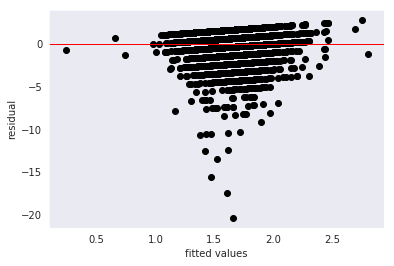

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pred, residuals, color='black')

plt.ylabel('residual')

plt.xlabel('fitted values')

plt.axhline(y= residuals.mean(), color='red', linewidth=1)

plt.show()

~ Bartlett Test

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


~ OBSERVATION:
- THE TEST RESULT IS LESS THAN THE CRITICAL VALUE
- THIS MEANS THE VARIANCES OF THE PREDICTION ERRORS ARE CLOSE TO EACH OTHER THUS THE MODEL IS FIT 

.

### .2. Logistic Regression

~ WE SHALL FIRST MAP THE UNIQUE VALUES IN OUR TARGET COLUMN TO NUMERICS
- Target column is 'outcome'  (draw,win,lose)

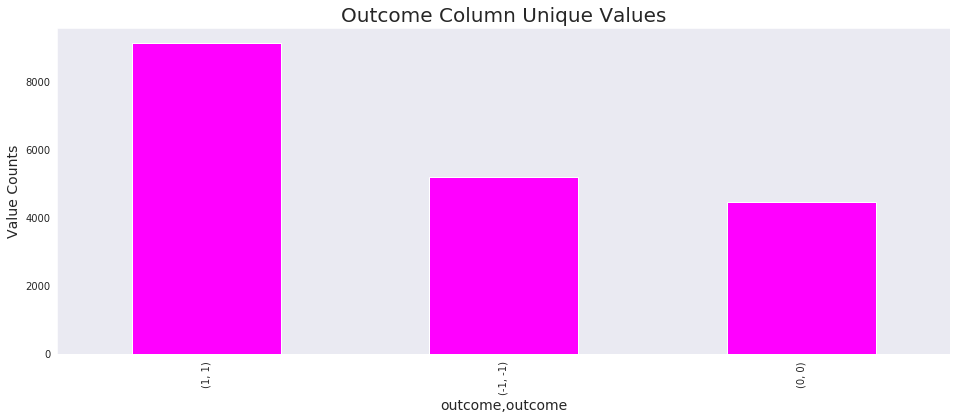

In [ ]:
# Unique value counts for outcome column

plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.title('Outcome Column Unique Values', fontsize = 20)

plt.xlabel('Unique Values', fontsize = 14)

plt.ylabel('Value Counts', fontsize = 14)

df.groupby(['outcome'])['outcome'].value_counts().sort_values(ascending = False).head(12).plot(kind = 'bar', color = 'magenta')


plt.show()

In [ ]:
df['outcome'] = df['outcome'].map({'Loss':-1, 'Draw':0, 'Win':1})

#### I. Splitting independent columns from target variable

In [ ]:
cols = [col for col in df.columns if col not in ['country_full', 'country_abrv','confederation', 'rank_date',
                                                'date', 'home_team', 'away_team',
                                                 'tournament', 'city', 'country', 'neutral','home_score',
                                                 'outcome', 'goal_diff','away_score'
                                                ]]
X = df[cols].values

y = df['outcome'].values

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [ ]:
regressor = LogisticRegression()

regressor.fit(X_train , y_train)

pred = regressor.predict(X_test)

residuals = np.subtract(pred , y_test)

print(residuals.mean())

pd.DataFrame(residuals).describe()

0.5357079567605884


0
count  5643.000000
mean      0.535708
std       1.015962
min      -2.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000

#### II. Evaluating the model

~ RMSE

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.7767145135566188
Mean Squared Error: 1.3189792663476874
Root Mean Squared Error: 1.148468226094082


~ THE R.M.S.E IS 1.14 WHICH IS LESS THAN 10% OF THE MEAN OF THE ACTUAL DATA

~ THEREFORE THE MODEL PREDICTIONS ARE COMMENDABLE

~ WE SHALL PERFORM MORE EVALUATIONS OF THE MODEL TO GET A BETTER UNDERSTANDING OF ITS PERFORMANCE 

.

~ Accuracy Score

In [ ]:
accuracy_score(y_test, pred)

0.4944178628389155

~ THE ACCURACY OF THE MODEL IS 49%

~ THIS SCORE IS LOW BUT EXPECTED SINCE THE MODEL WAS TRAINED WITH INSUFFICIENT DATA

~ WE SHALL CHALLENGE THE SOLUTION USING A GRADIENT BOOSTING MODEL TO SEE IF PERFORMANCE INCREASES

.

~ Classification Report

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


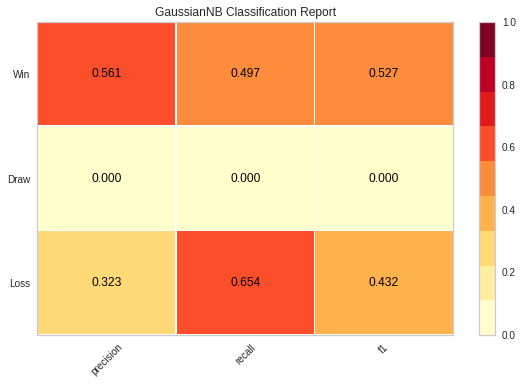

In [ ]:
from yellowbrick.classifier import ClassificationReport

gnb = GaussianNB()

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Loss','Draw', 'Win'])

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer

visualizer.score(X_test, y_test) # Evaluate the model on the test data

g = visualizer.poof() # Draw/show/poof the data


~ THE MODEL BEST PREDICTED WINS

.

## G. Challenging the solution

### .3. XGBOOST

#### I. Fitting the data

In [ ]:
#predicting with xgboost

model = XGBClassifier(n_estimators=1500,learning_rate =0.25)

model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### II. Feature Importances

In [ ]:
# Calculating Feature Importance

print(model.feature_importances_)

x = df[cols]

importances = pd.DataFrame({'feature':x.columns,'importance':np.round(model.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances

[0.05686395 0.09767982 0.05271297 0.05586954 0.08988897 0.
 0.08618584 0.1261941  0.08958543 0.14637977 0.0894349  0.
 0.05202269 0.05718201]


importance
feature                            
two_year_ago_weighted         0.146
last_year_avg_weighted        0.126
total_points                  0.098
cur_year_avg                  0.090
two_year_ago_avg              0.090
three_year_ago_avg            0.089
last_year_avg                 0.086
rank                          0.057
month                         0.057
rank_change                   0.056
previous_points               0.053
year                          0.052
cur_year_avg_weighted         0.000
three_year_ago_weighted       0.000

#### III. Predicting

In [ ]:
# make predictions for test data

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

#### IV. Evaluating the model's accuracy

In [ ]:
# Model Accuracy

model.score(X, y)

0.5599213100808167

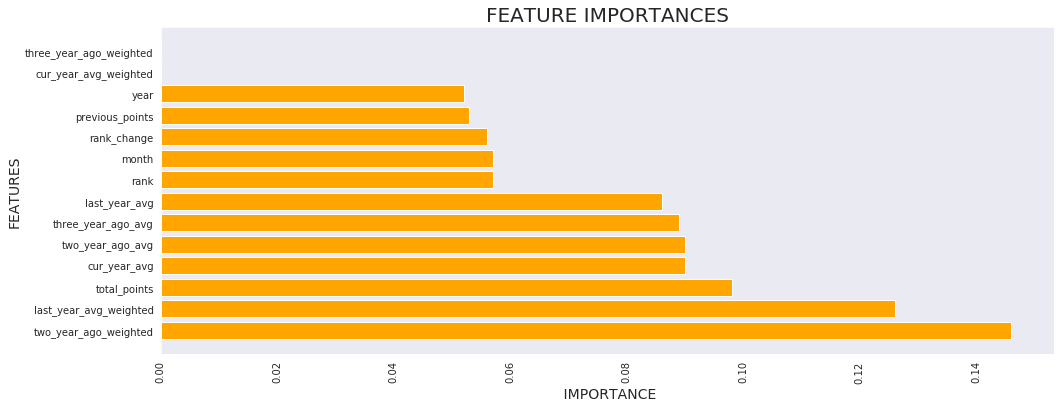

In [ ]:
# Feature Importance Visualization

plt.subplots(figsize = (16,6))

sns.set_style('dark')

plt.barh(importances.index, importances.importance,color = 'orange')

plt.title('FEATURE IMPORTANCES', fontsize = 20)

plt.xlabel(' IMPORTANCE', fontsize = 14,)

plt.xticks(rotation = 90)

plt.ylabel('FEATURES', fontsize = 14)

plt.show()

.

## H. Follow up questions

### a). Did we have the right data?

> Yes. The data was relevant to the research question

### b). Do we need other data to answer our question?

> Yes. The data was not enough to answer the research question more accurately 

### c). Did we have the right question?

> Yes. The research question was relevant to the data

.

.

## Conclusion

> The accuracy of the models was low. This could have improved if there was more data. 

> xgboost model performed better than the rest of the models

> regression models did not perform well since the data did not display collinearity when plotted against the target variable 